$$\frac{dy}{dx} = 0$$

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from edo import EDOModel


model = EDOModel(activations='sigmoid',denses=10)
full_size=100
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))
x = tf.linspace(0,1,full_size)[:,tf.newaxis]
y = tf.exp(-x**2/2)/(1+x+x**3)+x**2
model.fit(x,y,epochs=100,batch_size=full_size)

2025-01-05 19:54:17.576737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-05 19:54:17.597171: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-05 19:54:17.603069: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-05 19:54:17.618704: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


2025-01-05 19:54:19.888141: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-01-05 19:54:19.888206: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: mickael-Aspire-A515-54G
2025-01-05 19:54:19.888221: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: mickael-Aspire-A515-54G
2025-01-05 19:54:19.888415: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.120.0
2025-01-05 19:54:19.888467: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.120.0
2025-01-05 19:54:19.888479: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 550.120.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - loss: 0.4421
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4369
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4317
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4267
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4217
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4168
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4119
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4072
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4025
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3979
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3933
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3889
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3845
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3802
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3760
Epoch 16/100
1/1 ━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


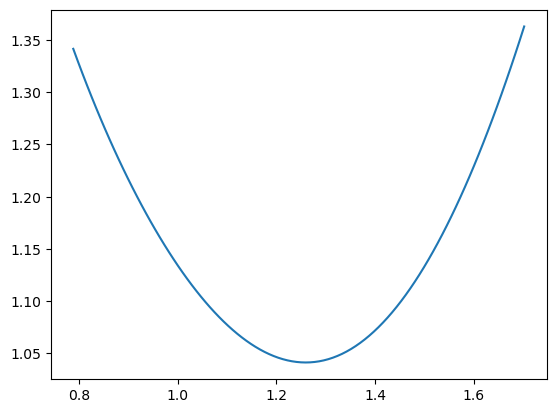

In [2]:
plt.plot(np.linspace(np.min(y),np.max(y)+.5,full_size),tf.math.abs(model.predict(x)-y))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


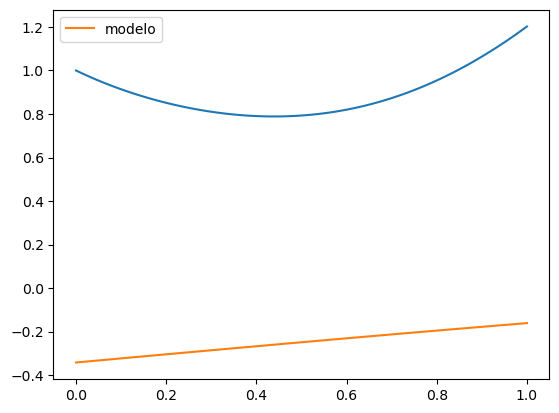

In [3]:
plt.plot(x,y)
plt.plot(x,model.predict(x),label='modelo')
plt.legend()